###Instruction
 - There are 8 problems. 100 Points each. The full score is 720.
 - Work in your notebook.
 - You may show your work on a separate sheet of A4. I'll also check there for partial credit. If you just give you answer without justification and it's wrong I can't give you any partial credit.
 - You may ask me for python syntax or matplotlib question. But, you know you can use shift-tab or ? for documentation.
 - Make sure your code works in order doing Kernel-->restart and then Cell--> Run All. Make sure what appears in the ouput is what you expect

In [282]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import math

<span style="color:red">800/720 100+% A+++. You and boss are the only two people who notice that we need 5 not 6 terms.</span>

###Problem 1)(100) 25 each.

1.1) Find first 3 **non-zero** terms taylor series expansion of
$$ f(x) = \sqrt{1+x} $$ around $x=0$.

<span style="color:red">25</span>

In [281]:
# Answer is in the paper
# 1+(x/2.)-((x**2)/8.)

1.2) Use the taylor series above to estimate $$\sqrt{0.9}$$.

<span style="color:red">25</span>

In [283]:
print "real sqr(0.9):", 0.9**0.5

# x = -0.1 because sqr(0.9) => (1+(-0.1)) = 0.9
x = -0.1
result = 1+(x/2.)-((x**2)/8.)
print "result:", result


real sqr(0.9): 0.948683298051
result: 0.94875


1.3) What is the bound on **truncation error** for the estimate you got in 1.2)?

<span style="color:red">25</span>

In [284]:
def f3(x):
    return (3./8)*((1+x)**(-5./2))
print f3(0.), f3(-0.1)
# worse case is at f3(-0.1)

print "real sqr(0.9):", 0.9**0.5
print "taylor:", result

# error of taylor series of 3 non_zero time is at term 3
error = (f3(-0.1)/math.factorial(3))*((-0.1)**3)
print "error:", error

upper = result + error
lower = result - error

print "Upper Bound:", upper
print "Lower Bound:", lower


0.375 0.488005811754
real sqr(0.9): 0.948683298051
taylor: 0.94875
error: -8.13343019591e-05
Upper Bound: 0.948668665698
Lower Bound: 0.948831334302


1.4) How many **non-zero** terms do I need such that the bound **truncation error** is less than $10^{-7}$?

Hint: Try doing a couple derivative and you will see the patterns.

<span style="color:red">25</span>

In [285]:
def fe(x,a,b):
    return a*((1+x)**b)
 
def err(a,b,n):
    result = (fe(-0.1,a,b)/math.factorial(n))*((-0.1)**n)
    while result < (-10**-7):
        n += 1
        a = a*b
        b = b-1
        result = (fe(-0.1,a,b)/math.factorial(n))*((-0.1)**n)
#         print a,b,n,result
    return n-1
print err(-1/4.,-3/2.,2), "term"


5 term


###Problem 2) (100)

2.1) Use bisection method to find **all solutions** of

$$ 2e^{-0.1x}\sin(x) = 0.55 $$

for $x>0$. See pic below.

Make sure your answers are at most $10^{-4}$ away from the actual solution.

<span style="color:red">100</span>

Ans 1: 0.286926269531
Ans 2: 2.77032470703
Ans 3: 6.86099243164
Ans 4: 8.70806884766


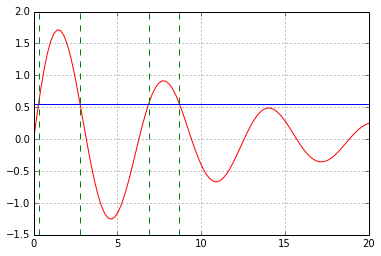

In [286]:
def f(x):
    return 2*math.exp(-0.1*x)*math.sin(x)
x = np.linspace(0,20,100)
fx = [f(xx) for xx in x]
plt.plot(x,fx, 'r')
plt.axhline(0.55)
plt.grid()

# To get data at y = 0.55
def f(x):
    return (2*math.exp(-0.1*x)*math.sin(x))-0.55

# I check the error how far of value y (at middle) at that time from the 0
def bisection(x1,x2):
    mid = (x1+x2)/2.
    left = f(x1) * f(mid)
    right = f(x2) * f(mid)
    if (x2-x1)/2. < 10**-4:
        return mid
    else:
        if left < 0:
            return bisection(x1,mid)
        elif right < 0:
            return bisection(mid,x2)
    
print "Ans 1:", bisection(0.,1.)
print "Ans 2:", bisection(1.,5.)
print "Ans 3:", bisection(5.,8.)
print "Ans 4:", bisection(8.,10.)

#plt.xlim(0,10)

plt.axvline(bisection(0.,1.), color='green', linestyle='dashed')
plt.axvline(bisection(1.,5.), color='green', linestyle='dashed')
plt.axvline(bisection(5.,8.), color='green', linestyle='dashed')
plt.axvline(bisection(8.,10.), color='green', linestyle='dashed')


###Problem 3) (100)

3.1) (90 points) Use Newton's method to find intersection of the following two lines.

$$f(x) = e^x -1.5$$

$$g(x) = x + \sin(x)$$

Any **decent** result from Newton's method will get your full credit. You **must** use Newton's method. No credit will be given to any other method. 

<span style="color:red">90</span>

x = 1.33784964779


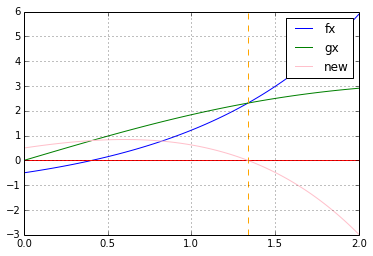

In [287]:
def f(x):
    return math.exp(x) - 1.5
def g(x):
    return x + math.sin(x)
x = np.linspace(0,2,100)
fx = [f(xx) for xx in x]
gx = [g(xx) for xx in x]
plt.plot(x,fx, label='fx')
plt.plot(x,gx, label='gx')
plt.axhline(0, color='red')
plt.grid()

# The intersection of 2 function mean f(x)=g(x)
def new_f(x):
    return x+math.sin(x)-(math.e**x)+1.5
zx = [new_f(xx) for xx in x]
plt.plot(x,zx, color='pink', label='new')
plt.legend()

# derivative of new function
def derif(x):
    h = 0.01
    return (new_f(x+(h/2.))-new_f(x-(h/2.)))/h

def newton(x,n):
    result = x
    for num in range(n):
        result = result - (new_f(result)/derif(result))
    return result
answer = newton(1,5)

print "x =", answer
plt.axvline(answer, linestyle='dashed', color='orange')

3.2)(5 Points) Which method converge faster: Newton's Method or bisection?

<span style="color:red">5</span>

In [197]:
# Newton Method is coverge faster than bisection method because draw a tangent line 
# is a better guess of next x than mid point guess

3.3) (5 Points) Does Newton's method guarantee to convege to the real answer?

<span style="color:red">5</span>

In [198]:
# No!
# Newton method is not guarantee to get the real answer
# because first, if the point is at the highest, the tangent line will be horizontal
# second, if tangent line is in circular back and forec between 2 point then no answer
# third, if tangent line make you go far from the answer

### Problem 4)  (100)

4.1)(35 points) Show that

$$f'(x) = \frac{-f(x+2h)+4f(x+h)-3f(x)}{2h} + O(h^2)$$

<span style="color:red">35</span>

In [288]:
# Answer is in the paper

4.2)(35 points) Let
$$f(x) = \sin(x^2)$$
Plot for $x \in [0,2\pi]$ the following lines

1. $f(x)$
2. $f'(x)$ caculated numerically using central difference method
3. $f''(x)$ calculated numerically

Pick appropriate value for $h$. Analytical answers will not be accepted.

<span style="color:red">35</span>

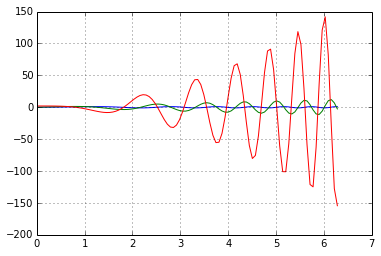

In [289]:
def f(x):
    return math.sin(x**2)

def f2(x,h):
    return (f(x+(h/2.))-f(x-(h/2.)))/h

def f3(x,h):
    return (f2(x+h,h)-f2(x-h,h))/(2*h)

xs = np.linspace(0,2*math.pi,100)
y1 = [f(xx) for xx in xs]
y2 = [f2(xx,0.01) for xx in xs]
y3 = [f3(xx,0.01) for xx in xs]
plt.plot(xs,y1)
plt.plot(xs,y2)
plt.plot(xs,y3)
plt.grid()

4.3)(30 points) Plot polynomial of **degree 3** that passes through the following four points.
$$(0.1, 3), (0.2,1), (0.5, -1), (1, 1) $$

Make sure your polynomial is of **degree 3**.

<span style="color:red">30</span>

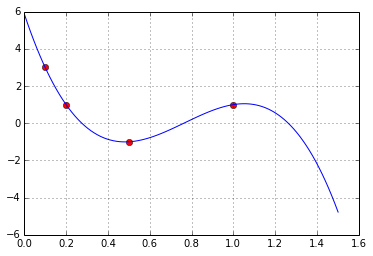

In [290]:
x = [0.1,0.2,0.5,1]
y = [3,1,-1,1]
plt.plot(x,y,'or')

def w0(x):
    return ((x-0.2)*(x-0.5)*(x-1))/((0.1-0.2)*(0.1-0.5)*(0.1-1))

def w1(x):
    return ((x-0.1)*(x-0.5)*(x-1))/((0.2-0.1)*(0.2-0.5)*(0.2-1))

def w2(x):
    return ((x-0.1)*(x-0.2)*(x-1))/((0.5-0.1)*(0.5-0.2)*(0.5-1))

def w3(x):
    return ((x-0.1)*(x-0.2)*(x-0.5))/((1-0.1)*(1-0.2)*(1-0.5))

def p(x):
    return (3*w0(x))+w1(x)+(-1*w2(x))+w3(x)

xs = np.linspace(0,1.5,100)
ys = [p(xx) for xx in xs]
plt.plot(xs,ys)
plt.grid()

###Problem 5)  (100)

5.1) (70 points)Use trapezoid rule with 100 subdivision to find the following calculate the following integral.

$$ \int\limits_{x=1}^{x=2} \frac{1}{x} \; dx$$

<span style="color:red">70</span>

In [291]:
def f(x):
    return 1./x

def trapezoid(x1,x2,n):
    h = (x2-x1)/n
    result = (f(x1)/2.) + (f(x1+(n*h))/2.)
    for a in range(1,n):
        result += f(x1+(a*h))
    return result*h
answer = trapezoid(1.,2.,100)

print "Answer =", answer

Answer = 0.693153430482


5.2) (15 points)What is bound on **truncation error** for your answer in 3.1)

<span style="color:red">15</span>

In [292]:
# error = (1./n**2)*(f2(E)/12.)*((b-a)**3)

# second derivaive of 1/x
def f2(x):
    return 2./(x**3)
print f2(1), f2(2)
# worse case is at f(1)

print "Answer =", answer

def error(a,b,n,E):
    return (1./n**2)*(f2(E)/12.)*((b-a)**3)
errors = error(1,2,100,1)

print "error =", errors

upper = answer + errors
lower = answer - errors

print "Upper Bound:", upper
print "Lower Bound:", lower

2.0 0.25
Answer = 0.693153430482
error = 1.66666666667e-05
Upper Bound: 0.693170097148
Lower Bound: 0.693136763815


5.3) (15 points) How many subdivision do we need to make sure that our answer is at most $10^{-6}$ from the real answer?

<span style="color:red">15</span>

In [293]:
# From previous 5.2 we get the worse case f_2(E) = 2.0

def error(a,b,wc):
    n = 1
    result = (1./n**2)*(wc/12.)*((b-a)**3)
    while result > 10**-6:
        n += 1
        result = (1./n**2)*(wc/12.)*((b-a)**3)
    return n
print error(1,2,2.0), "subdivision"


409 subdivision


###Problem 6) (100)

<span style="color:red">100</span>

6.1) (70 points) An ice cream store record the temperature and number of ice cream sold on each day. The store have the following data. The store owner want to model the data with a straight line
$$ s = at + b$$
where $s$ is sale number and $t$ is temperature in celcius.

Find the slope and intercept of the best fitted line using least square method.

slope = 5.32377667673
intercept = 18.944209959


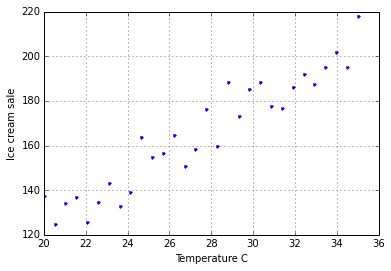

In [294]:
temperature = [ 20.        ,  20.51724138,  21.03448276,  21.55172414,
        22.06896552,  22.5862069 ,  23.10344828,  23.62068966,
        24.13793103,  24.65517241,  25.17241379,  25.68965517,
        26.20689655,  26.72413793,  27.24137931,  27.75862069,
        28.27586207,  28.79310345,  29.31034483,  29.82758621,
        30.34482759,  30.86206897,  31.37931034,  31.89655172,
        32.4137931 ,  32.93103448,  33.44827586,  33.96551724,
        34.48275862,  35.        ]
sale = [ 137.51785095,  124.64402538,  134.12166738,  136.9660818 ,
        125.79715671,  134.69878693,  143.17103597,  132.86731762,
        139.17234271,  163.95542568,  154.81626083,  156.57737534,
        164.53795806,  150.94106806,  158.46257369,  176.40478845,
        159.69716465,  188.52792981,  173.26043665,  185.19117472,
        188.23649894,  177.70904806,  176.95357726,  186.04751343,
        192.19480621,  187.55949344,  195.22922111,  201.86099821,
        195.35633724,  217.96614178]
plt.plot(temperature, sale, '.')
plt.ylabel('Ice cream sale')
plt.xlabel('Temperature C')
plt.grid()

data_x = np.array(temperature)
data_y = np.array(sale)

lists = []
def line(t):
    n = len(data_x)
    x = sum(data_x)/n
    y = sum(data_y)/n
    x_2 = sum(data_x**2)/n
    xy = sum(data_x*data_y)/n
    
    a = (xy-(y*x))/(x_2-(x**2))
    b = y-(a*x)
    lists.append([a,b])
    return (a*t)+b

line(20)
print "slope =", lists[0][0]
print "intercept =",lists[0][1]

6.2) (15 points)Plot the best fitted line along with the data points.

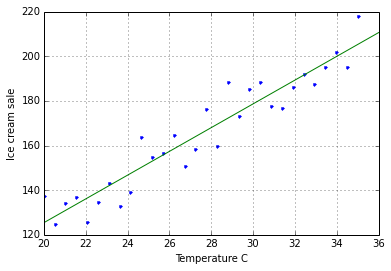

In [295]:
plt.plot(temperature, sale, '.')
plt.ylabel('Ice cream sale')
plt.xlabel('Temperature C')
plt.grid()

xs = np.linspace(20,36,100)
ys = [line(t) for t in xs]
plt.plot(xs,ys)

6.3) (15 points) If the temperature today is 30 degree, how many ice cream do we expect to sell?

In [296]:
print line(30),
print "or it mean 178 piece"

178.657510261 or it mean 178 piece


###Problem 7) (100)

<span style="color:red">100</span>

7) Find the area of the shaded region to a decent accuracy. 

The blue line is
$$f(x) = e^{-x}\sin(\pi x)$$
and the green line is
$$g(x) = 0.5 - \frac{x}{2.5}$$

blue = 0.347039379568 , green = 0.20612936945
Area of shade region = 0.140910010118


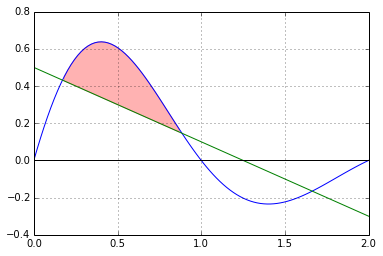

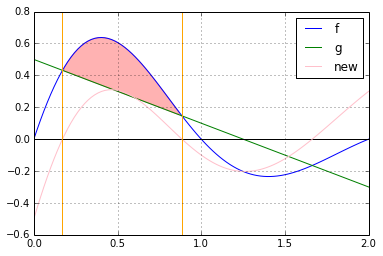

In [297]:
x = np.linspace(0,2,100)
def f(x):
    return math.exp(-x)*math.sin(math.pi*x)
def g(x):
    return 0.5-x/2.5
fx = np.array([f(xx) for xx in x])
gx = np.array([g(xx) for xx in x])
plt.plot(x,fx)
plt.plot(x,gx)
plt.grid()
plt.axhline(0,color='k')
plt.fill_between(x,fx,gx,where=((fx>gx) & (gx>0)), color='red', alpha=0.3)

# -------------------------------------
# Find the intersection of 2 graph
def new_f(x):
    return math.e**(-x)*math.sin(math.pi*x) -0.5 + (x/2.5)

# derivative of new function
def derif(x):
    h = 0.01
    return (new_f(x+(h/2.))-new_f(x-(h/2.)))/h

def newton(x,n):
    result = x
    for num in range(n):
        result = result - (new_f(result)/derif(result))
    return result
answer1 = newton(0,5)
answer2 = newton(1,5)

plt.figure()

plt.plot(x,fx, label='f')
plt.plot(x,gx, label='g')
plt.grid()
plt.axhline(0,color='k')
plt.fill_between(x,fx,gx,where=((fx>gx) & (gx>0)), color='red', alpha=0.3)

zx = [new_f(xx) for xx in x]
plt.plot(x,zx, color='pink', label='new')
plt.legend()

plt.axvline(answer1, color='orange')
plt.axvline(answer2, color='orange')


# Get only the area of blue line to green line
def trapezoid(x1,x2,n,f):
    h = (x2-x1)/n
    result = (f(x1)/2.) + (f(x1+(n*h))/2.)
    for a in range(1,n):
        result += f(x1+(a*h))
    return result*h
blue = trapezoid(answer1,answer2,100,f)
green = trapezoid(answer1,answer2,100,g)
print "blue =",blue, ", green =", green
print "Area of shade region =",blue - green


###Problem 8)  (100)

<span style="color:red">100</span>

8) Cheating Fourier Series. In the homework you have found that you can approximate the function using a bunch of sine and cosine and there is a way to find each of the coefficient by performing integrations.

Now we are going to achieve a similar effect **without** integration. We will use least square method instead.

Let us consider the triangular function shown below. We want to approximate this using a bunch of sines:

$$ \text{triangle}(x) \approx a \sin(\pi x) + b \sin(3 \pi x) + c \sin(5 \pi x) $$

**Find a, b, and c using least squre method. Plot your approximation along with triangular curve.**

Hint: This question is actually much easier than it looks. Figure out what is your data and what is your parameter.

Hint2: You may use `np.linalg.solve`. Type `?np.linalg.solve` for documentation. Scroll down for example. Also, `np.sin` and all those numpy broadcast operations will save countless number of lines from your code.

a = 0.405267728003
b = -0.0450146186163
c = 0.0161943468148


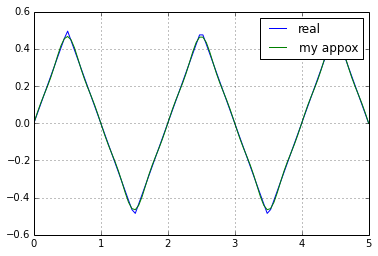

In [298]:
def triangle(x):
    t = x%2.0
    if t < 0.5: 
        return 1*t
    elif t < 1.5:
        return 1-t
    else:
        return t-2

x1 = np.linspace(0,5,100)
y1 = [triangle(xx) for xx in x1]
plt.plot(x1,y1, label='real')
plt.grid()

x = np.array(x1)
y = np.array(y1)

def sin(xx,c):
    ans = math.pi*c*xx
    return np.sin(ans)
    
def triangular(t):
    n = len(x)
    s1_2 = sum(sin(x,1)**2)/n
    s3_s1 = sum(sin(x,3)*sin(x,1))/n
    s5_s1 = sum(sin(x,5)*sin(x,1))/n
    
    s3_2 = sum(sin(x,3)**2)/n
    s5_s3 = sum(sin(x,5)*sin(x,3))/n
    
    s5_2 = sum(sin(x,5)**2)/n
    
    y_s1 = sum(y*sin(x,1))/n
    y_s3 = sum(y*sin(x,3))/n
    y_s5 = sum(y*sin(x,5))/n
    
    A = [[s1_2,s3_s1,s5_s1],[s3_s1,s3_2,s5_s3],[s5_s1,s5_s3,s5_2]]
    C = [y_s1,y_s3,y_s5]
    result = np.linalg.solve(A,C)
    return result

abc = list(triangular(1))
print "a =", abc[0]
print "b =", abc[1]
print "c =", abc[2]

def ft(t,a,b,c):
    return a*sin(t,1) + b*sin(t,3) + c*sin(t,5)

y2 = [ft(xx,abc[0],abc[1],abc[2]) for xx in x1]
plt.plot(x1,y2, label='my appox')
plt.legend()
# plt.xlim(0,2)
